In [2]:
## importing essential Libraries

import os
import pandas as pd 
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf 
from tensorflow.keras import layers, models, backend
import matplotlib.pyplot as plt

## batch specification
batch_size = 50
img_height = 150
img_width = 150


## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'traffic_Data\DATA',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'traffic_Data\DATA',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

class_names = training_ds.class_names

<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\D'
C:\Users\surya\AppData\Local\Temp\ipykernel_10848\2322260757.py:20: SyntaxWarning: invalid escape sequence '\D'
  'traffic_Data\DATA',
C:\Users\surya\AppData\Local\Temp\ipykernel_10848\2322260757.py:31: SyntaxWarning: invalid escape sequence '\D'
  'traffic_Data\DATA',


Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [3]:
model = models.Sequential([
layers.Rescaling(1./255, input_shape=(img_height, img_width,3)),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(len(class_names), activation='softmax')
])



c:\Users\surya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 20)     │         3,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,658,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 58)             │         3,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,671,054 (6.37 MB)

 Trainable params: 1,671,054 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
epochs = 16
history = model.fit(training_ds, validation_data=testing_ds, epochs=epochs)

Epoch 1/16
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.9380 - loss: 0.2472 - val_accuracy: 0.9388 - val_loss: 0.2878
Epoch 2/16
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.9747 - loss: 0.1184 - val_accuracy: 0.9365 - val_loss: 0.2186
Epoch 3/16
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9912 - loss: 0.0494 - val_accuracy: 0.9640 - val_loss: 0.1575
Epoch 4/16
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9950 - loss: 0.0307 - val_accuracy: 0.9652 - val_loss: 0.1619
Epoch 5/16
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.9982 - loss: 0.0153 - val_accuracy: 0.9676 - val_loss: 0.1479
Epoch 6/16
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9748 - val_loss: 0.1389
Epoch 7/16
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9736 - val_loss: 0.1337
Epoch 8/16
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accu

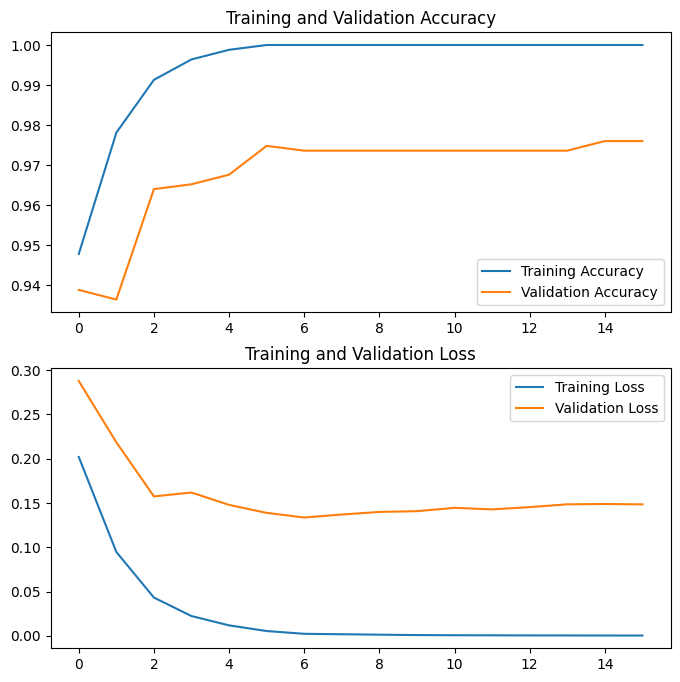

Maximum Validation Accuracy: 0.9760192036628723


In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the maximum validation accuracy
print("Maximum Validation Accuracy:", max(val_acc))

In [9]:
#save the model
model.save('traffic_sign_model.h5')
print("Model saved successfully")


Model saved successfully


In [10]:
## testing the model
test_loss, test_acc = model.evaluate(testing_ds)
print("Test accuracy: ", test_acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9823 - loss: 0.1224
Test accuracy:  0.9760192036628723


In [15]:
#predicting the model on a new image
img = tf.keras.preprocessing.image.load_img(
    r"traffic_Data\DATA\11\011_1_0002.png", target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This image most likely belongs to 11 with a 4.55 percent confidence.


In [17]:
%%writefile traffic_sign_model.py
import tensorflow as tf
import numpy as np
import streamlit as st
from PIL import Image
import os

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('traffic_sign_model.h5')
    return model

def import_and_predict(image_data, model):
        size = (150,150)
        image = Image.open(image_data)
        image = image.resize(size)
        img_array = np.array(image)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array/255
        prediction = model.predict(img_array)
        return prediction

model = load_model()

st.write("""
            # Traffic Sign Recognition
            """
            )

st.write("This is a simple image classification web app to predict traffic signs")

file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(file, model)
    score = tf.nn.softmax(predictions[0])
    st.write("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))
    st.write("The model is trained on the following classes: ", class_names)

## running the app
if __name__ == '__main__':
    main()


Overwriting traffic_sign_model.py
